This is a step-by-step guide to performing K-Means clustering using Python and a real dataset, specifically the Iris dataset. K-Means clustering is a widely used unsupervised machine learning technique for grouping similar data points into clusters.

# Step 1: Import Necessary Libraries

Importing Python libraries, including NumPy, Pandas, Matplotlib, and scikit-learn's KMeans and the Iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 2: Load the Iris Dataset


Load the Iris dataset, a commonly used dataset in machine learning, which contains measurements of sepal and petal lengths and widths for different species of iris flowers.

In [4]:
from sklearn.datasets import load_iris
data = load_iris()

# Step 3: Determine the Number of Clusters (K)

Here, we are using the Silhouette Method to find the optimal number of clusters. The Silhouette score measures how similar each data point in one cluster is to the data points in the neighboring clusters. A higher Silhouette score indicates better-defined clusters.

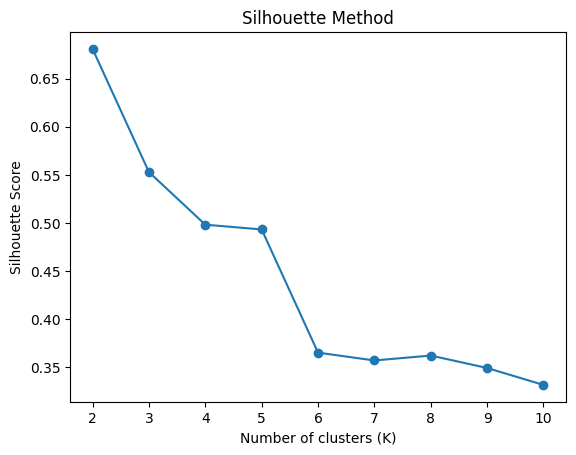

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

# Load the Iris dataset
data = load_iris()
X = data.data

# Initialize a list to store the Silhouette scores for different K values
silhouette_scores = []

# Define a range of K values to test
# The minimum number of clusters should be 2 as dissimilarity would not be defined for a single cluster
K_range = range(2, 11)

for K in K_range:
    kmeans = KMeans(n_clusters=K, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate the Silhouette score for the current K value
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores for different K values
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


The Silhouette Score reaches its global maximum at the optimal K. This should typically appear as a peak in the Silhouette Score-versus-K plot. Here, you can see that there is a clear peak at K = 2. Hence, the optimal number of clusters is 2.

# Step 4: Perform K-Means Clustering

Apply the K-Means clustering algorithm with the chosen optimal K value (in this case, K=2).

In [4]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=0)

# Step 5: Visualize the Clusters

Visualize the resulting clusters by creating a 2D scatter plot and marking cluster centers with red 'x' symbols. Here, we are using sepal length and sepal width as an example.

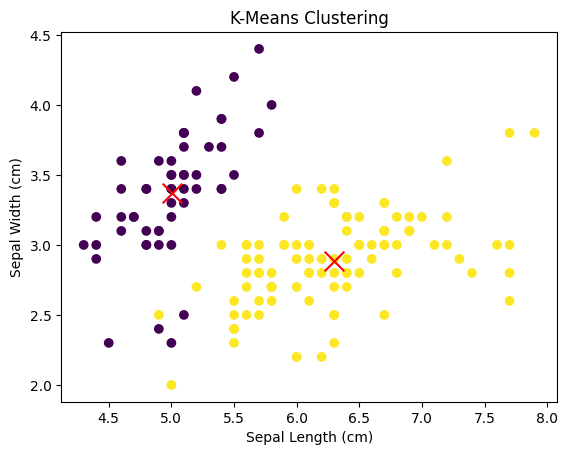

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='x')
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()